In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from google.colab import files
import io

%matplotlib inline

rnd_state = 42

In [ ]:
try: #if the editor is colab
  from google.colab import files
  uploaded = files.upload()
except: #else
  print('Not in colab')

Saving exam_2021_01_27.csv to exam_2021_01_27 (1).csv


In [ ]:
df = pd.read_csv('exam_2021_01_27.csv', sep = ",", header=None)
print(df.shape)
df.head()

(150, 5)


,0,1,2,3,4
0,5.1,3.5,a,NaN,0
1,4.9,3.0,a,NaN,0
2,NaN,3.2,a,NaN,0
3,4.6,NaN,a,0.2,0
4,5.0,3.6,a,0.2,0


In [ ]:
df.describe()

,0,1,3,4
count,141.000000,140.000000,137.000000,150.000000
mean,5.897872,3.036429,1.290511,1.000000
std,0.820232,0.437654,0.733934,0.819232
min,4.300000,2.000000,0.100000,0.000000
25%,5.200000,2.800000,0.400000,0.000000
50%,5.800000,3.000000,1.400000,1.000000
75%,6.400000,3.300000,1.800000,2.000000
max,7.900000,4.400000,2.500000,2.000000


In [ ]:
if len(df) != len(df.dropna()):
  print('This dataset contains NA/NaN values: {:}'.format(len(df)-len(df.dropna())))

df1 = df.dropna()
df1

This dataset contains NA/NaN values: 28


,0,1,2,3,4
4,5.0,3.6,a,0.2,0
7,5.0,3.4,a,0.2,0
10,5.4,3.7,a,0.2,0
11,4.8,3.4,a,0.2,0
13,4.3,3.0,a,0.1,0
...,...,...,...,...,...
145,6.7,3.0,d,2.3,2
146,6.3,2.5,d,1.9,2
147,6.5,3.0,d,2.0,2
148,6.2,3.4,d,2.3,2


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = OrdinalEncoder()
df2 = df1
df2[[2]] = enc.fit_transform(df1[[2]])
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,0,1,2,3,4
4,5.0,3.6,0.0,0.2,0
7,5.0,3.4,0.0,0.2,0
10,5.4,3.7,0.0,0.2,0
11,4.8,3.4,0.0,0.2,0
13,4.3,3.0,0.0,0.1,0
...,...,...,...,...,...
145,6.7,3.0,3.0,2.3,2
146,6.3,2.5,3.0,1.9,2
147,6.5,3.0,3.0,2.0,2
148,6.2,3.4,3.0,2.3,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df2.drop(4, axis=1)
y = df2[4]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((91, 4), (31, 4), (91,), (31,))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier #model1

In [ ]:
dt_params = [{'max_depth': range(1, 20)}]

decision_tree = DecisionTreeClassifier(random_state=rnd_state, criterion='entropy')

grid_decision_tree = GridSearchCV(decision_tree,
                   param_grid=dt_params,
                   scoring='accuracy')

grid_decision_tree.fit(Xtrain, ytrain)

max_depth_max = grid_decision_tree.best_params_['max_depth']
print("Best parameter: {}".format(grid_decision_tree.best_params_))

Best parameter: {'max_depth': 4}


In [ ]:
model1 = DecisionTreeClassifier(random_state=rnd_state, max_depth=grid_decision_tree.best_params_['max_depth'])

model1 = model1.fit(Xtrain,ytrain)
ypred = model1.predict(Xtest)
ypred

array([1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1,
       2, 0, 2, 1, 1, 1, 2, 2, 2])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


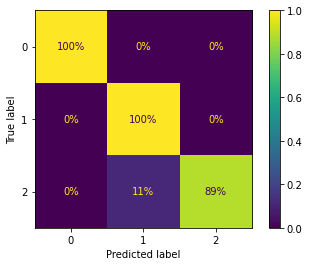

In [ ]:
plot_confusion_matrix(model1, Xtest, ytest, values_format= '.0%', normalize='true')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #model2

In [ ]:
dt_params = [{'n_neighbors': range(1, 20)}]

neighbors = KNeighborsClassifier()

grid_neighbors = GridSearchCV(neighbors, param_grid=dt_params, scoring='accuracy')

grid_neighbors.fit(Xtrain, ytrain)

n_neighbors_max = grid_neighbors.best_params_['n_neighbors']
print("Best parameter: {}".format(grid_neighbors.best_params_))

Best parameter: {'n_neighbors': 6}


In [ ]:
model2 = KNeighborsClassifier(n_neighbors=grid_neighbors.best_params_['n_neighbors'])

model2 = model2.fit(Xtrain,ytrain)
ypred = model2.predict(Xtest)
ypred

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1,
       2, 0, 2, 1, 1, 1, 2, 1, 2])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


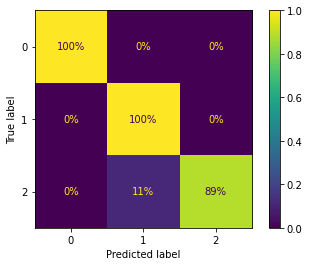

In [ ]:
plot_confusion_matrix(model2, Xtest, ytest, values_format= '.0%', normalize='true')